     age  trtbps  chol  thalachh  cluster_label_hierarchical
0     63     145   233       150                           0
1     37     130   250       187                           0
2     41     130   204       172                           1
3     56     120   236       178                           0
4     57     120   354       163                           0
..   ...     ...   ...       ...                         ...
298   57     140   241       123                           0
299   45     110   264       132                           0
300   68     144   193       141                           1
301   57     130   131       115                           1
302   57     130   236       174                           0

[303 rows x 5 columns]


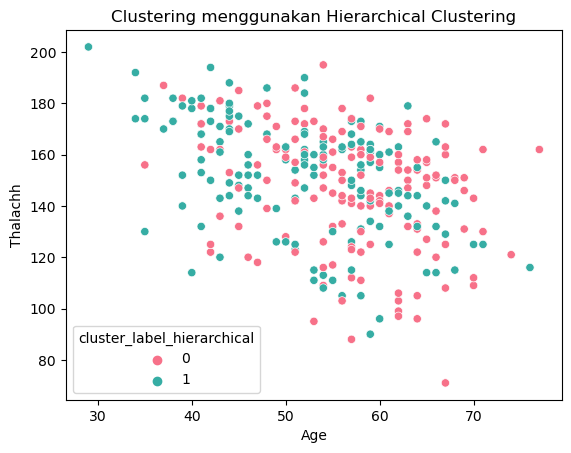

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Membaca data dari file CSV
data = pd.read_csv('heart.csv')

# Pilih kolom yang akan digunakan untuk clustering
X = data[['age', 'trtbps', 'chol', 'thalachh']]

# Mengambil data ke-166 dan ke-302 sebagai acuan untuk klaster
acuan_1 = X.iloc[165]  # Data ke-166 (indeks dimulai dari 0)
acuan_2 = X.iloc[302]  # Data ke-302 (indeks dimulai dari 0)

# Hierarchical Clustering dengan metode linkage 'ward'
hierarchical = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_hierarchical = hierarchical.fit_predict(X)

# Menambahkan kolom label ke dataframe asli
data['cluster_label_hierarchical'] = labels_hierarchical

# Menampilkan hasil clustering
print(data[['age', 'trtbps', 'chol', 'thalachh', 'cluster_label_hierarchical']])

# Scatter plot untuk visualisasi klaster
sns.scatterplot(x='age', y='thalachh', hue='cluster_label_hierarchical', data=data, palette='husl')
plt.title('Clustering menggunakan Hierarchical Clustering')
plt.xlabel('Age')
plt.ylabel('Thalachh')
plt.show()


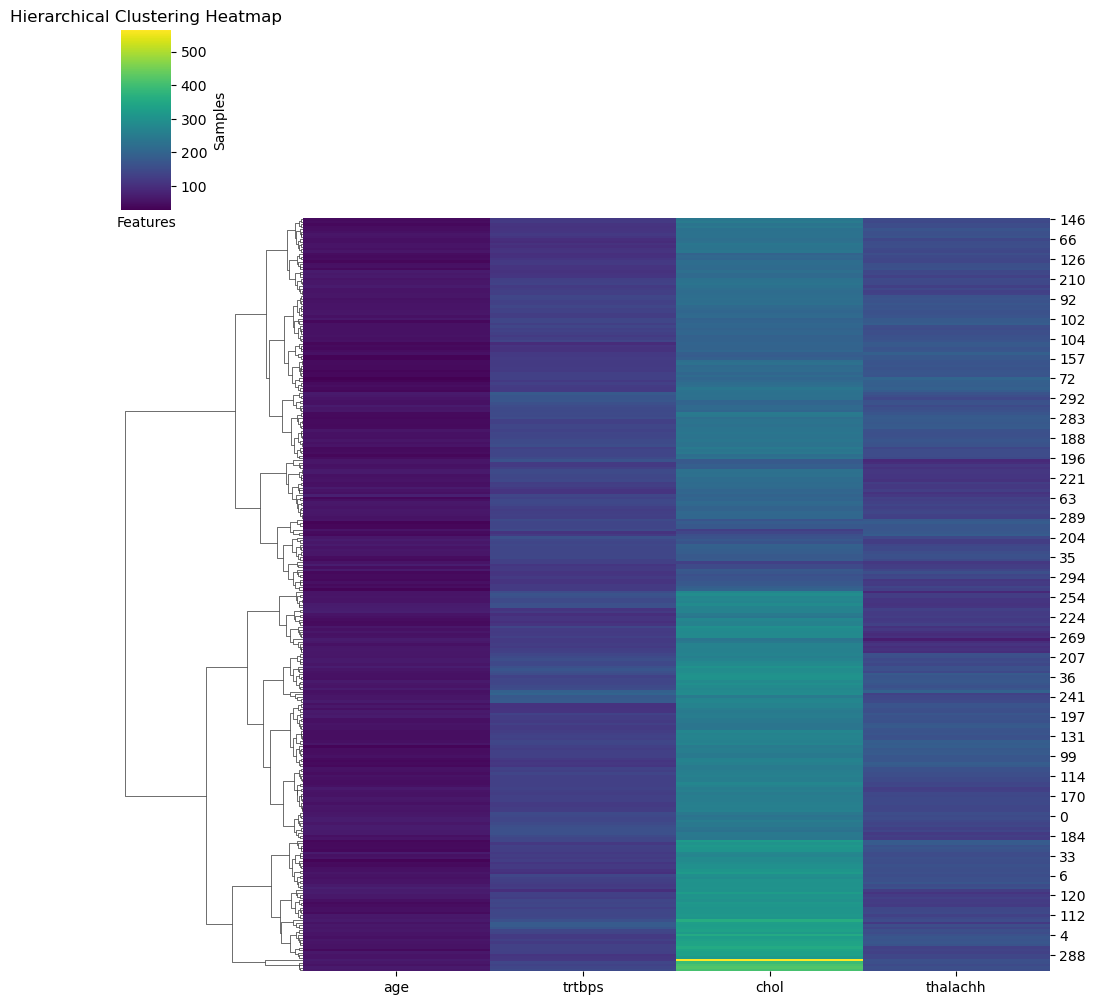

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

# Menghitung linkage matrix menggunakan metode ward
linkage_matrix = linkage(X, method='ward')

# Membuat tampilan dendrogram 2D (heatmap)
sns.clustermap(X, row_linkage=linkage_matrix, col_cluster=False, cmap='viridis')
plt.title('Hierarchical Clustering Heatmap')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()


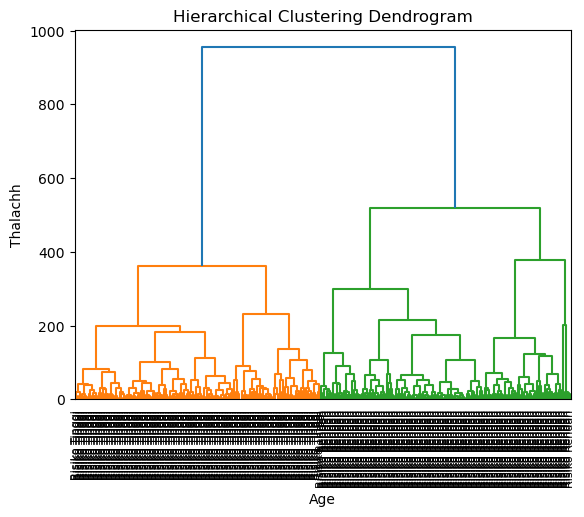

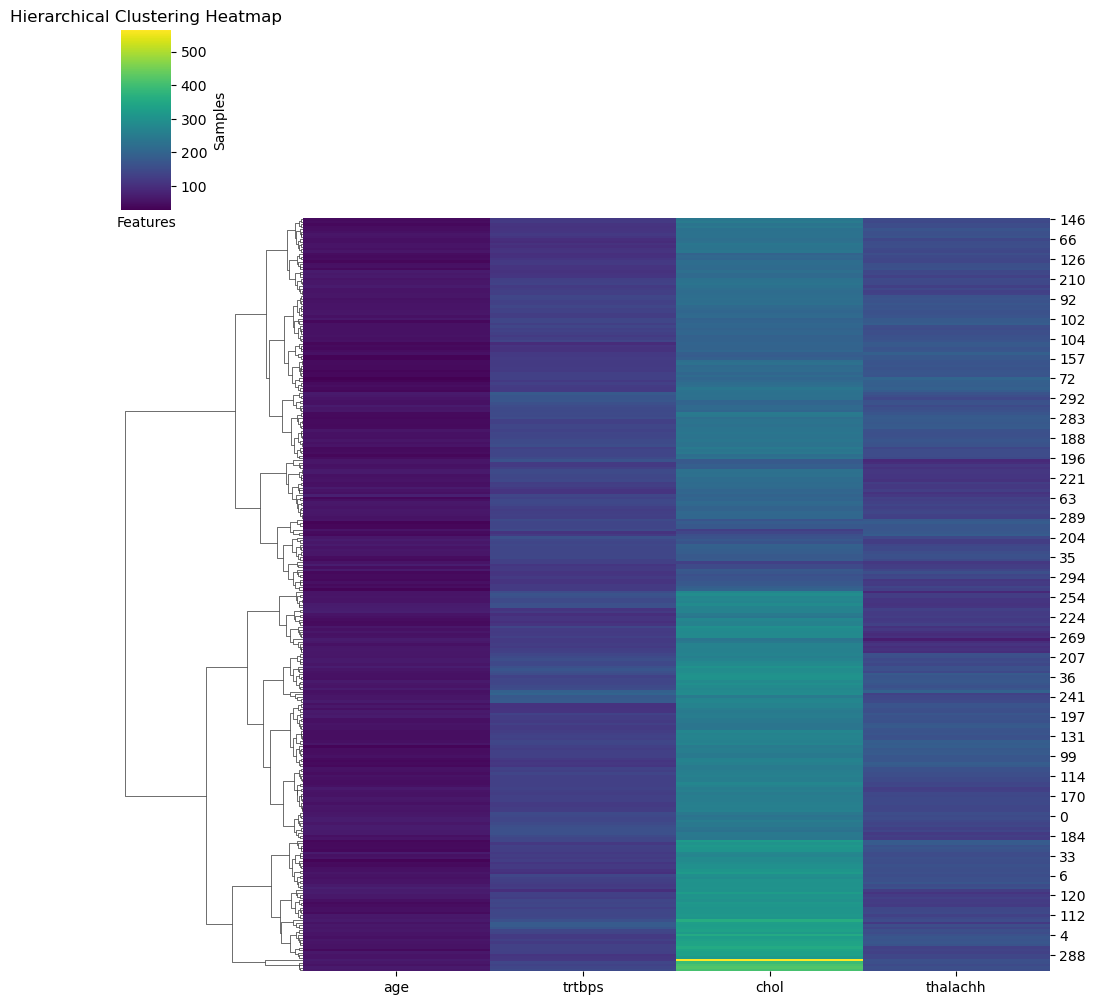

In [5]:
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Menggunakan kmeans.labels_ untuk mendapatkan label klaster dari data yang telah dilatih
labels_hierarchical = hierarchical.labels_

# Menambahkan kolom 'cluster_hierarchical' ke data asli
data['cluster_hierarchical'] = labels_hierarchical
labels_hierarchical = data['cluster_hierarchical'].replace({0: 'Risiko Rendah', 1: 'Risiko Tinggi'})

cluster_0_hierarchical = data[data['cluster_hierarchical'] == 0]
cluster_1_hierarchical = data[data['cluster_hierarchical'] == 1]

# Membuat dendrogram untuk visualisasi Hierarchical Clustering
linkage_matrix = linkage(X, method='ward')
dendrogram(linkage_matrix, labels=labels_hierarchical.values, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Age')
plt.ylabel('Thalachh')
plt.show()

# Membuat heatmap untuk visualisasi Hierarchical Clustering
sns.clustermap(X, row_linkage=linkage_matrix, col_cluster=False, cmap='viridis')
plt.title('Hierarchical Clustering Heatmap')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()


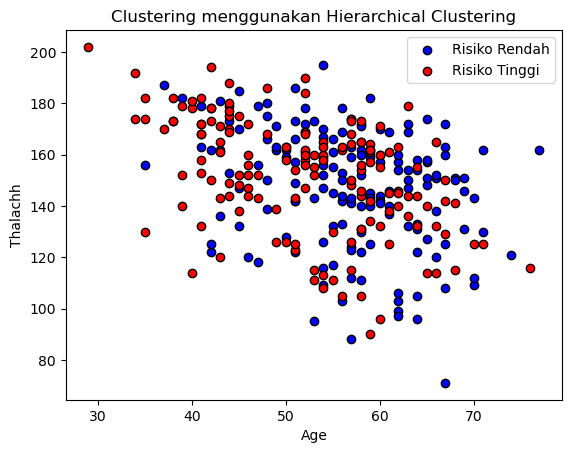

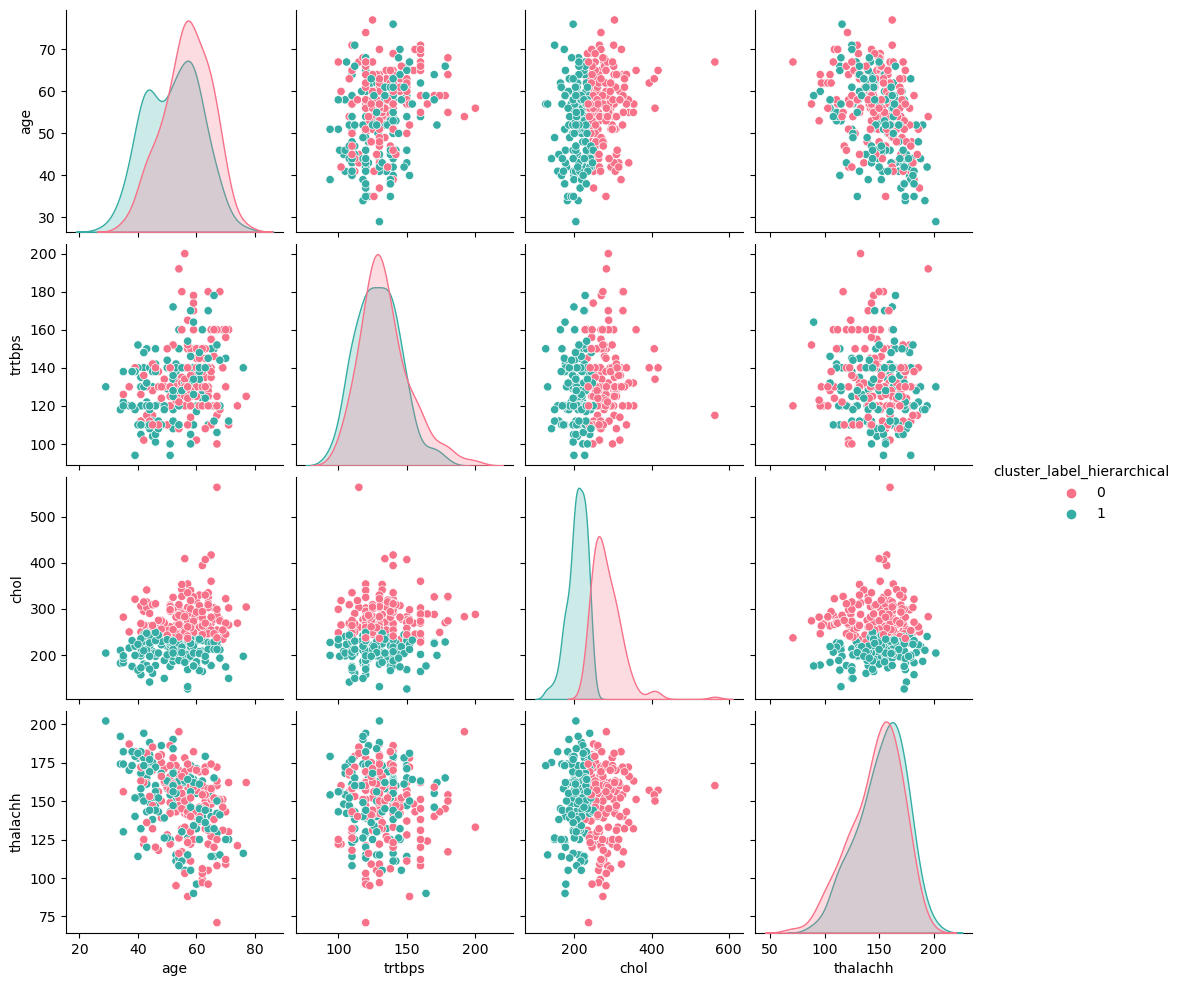

In [8]:
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Menggunakan Hierarchical Clustering dengan metode linkage 'ward'
hierarchical = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_hierarchical = hierarchical.fit_predict(X)

# Menambahkan kolom label ke dataframe asli
data['cluster_label_hierarchical'] = labels_hierarchical

# Membuat cluster_0 dan cluster_1 berdasarkan label klaster Hierarchical Clustering
cluster_0_hierarchical = data[data['cluster_label_hierarchical'] == 0]
cluster_1_hierarchical = data[data['cluster_label_hierarchical'] == 1]

# Scatter plot untuk visualisasi klaster menggunakan Hierarchical Clustering
plt.scatter(cluster_0_hierarchical['age'], cluster_0_hierarchical['thalachh'], label='Risiko Rendah', c='blue', marker='o', edgecolors='black')
plt.scatter(cluster_1_hierarchical['age'], cluster_1_hierarchical['thalachh'], label='Risiko Tinggi', c='red', marker='o', edgecolors='black')

plt.title('Clustering menggunakan Hierarchical Clustering')
plt.xlabel('Age')
plt.ylabel('Thalachh')

plt.legend()
plt.show()

# Pair plot untuk visualisasi fitur-fitur dalam satu plot menggunakan Hierarchical Clustering
sns.pairplot(data[['age', 'trtbps', 'chol', 'thalachh', 'cluster_label_hierarchical']], hue='cluster_label_hierarchical', palette='husl')
plt.show()
